# Getting started

In [1]:
import os
import datetime as dt
import pandas as pd
import xarray as xr
import hatyan
hatyan.close('all')

# optionally set logging level/format (and stream to prevent red background)
import logging, sys
logging.basicConfig(level="INFO", format='%(message)s', stream=sys.stdout)

In [2]:
# defining a list of the components to be analysed ()'year' contains 94 components and the mean H0)
const_list = hatyan.get_const_list_hatyan('year')


In [3]:
# reading and editing time series (Cuxhaven dataset from UHSLC database)
# results in a pandas DataFrame a 'values' column (water level in meters) and a pd.DatetimeIndex as index
file_data_meas = 'http://uhslc.soest.hawaii.edu:80/opendap/rqds/global/hourly/h825a.nc'
times_pred = slice("2017-01-01", "2018-12-31", 10)
ts_data = xr.open_dataset(file_data_meas)
ts_data_sel = ts_data.sea_level.isel(record_id=0).sel(time=slice(times_pred.start,times_pred.stop))
# correct from mm to meters and for 5m offset
ts_data_sel = (ts_data_sel/1000-5).assign_attrs({'units':'meters'})
ts_meas = pd.DataFrame({'values':ts_data_sel.to_series()})


running: analysis
analysis_perperiod=Y, separate periods are automatically determined from timeseries
analyzing 2017 of sequence ['2017', '2018']
ANALYSIS initializing
{hatyan_settings}
#timesteps    = 8760
tstart        = 2017-01-01 00:00:00tstop         = 2017-12-31 22:59:59
timestep      = None
components analyzed  = 95
percentage_nan in values_meas_sel: 0.00%
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (1.000008 hour), there are 2 unique timesteps)
Rayleigh criterion OK (always>0.70, minimum is 1.00)
Frequencies are far enough apart (always >0.000080, minimum is 0.000114)
calculating xTx matrix
condition of xTx matrix: 3.91
matrix system solved, elapsed time: 0:00:00.093905
ANALYSIS finished
analyzing 2018 of sequence ['2017', '2018']
ANALYSIS initializing
{hatyan_settings}
#timesteps    = 8760
tstart        = 2018-01-01 00:00:00tstop         = 2018-12-31 22:59:59
timestep      = None
co

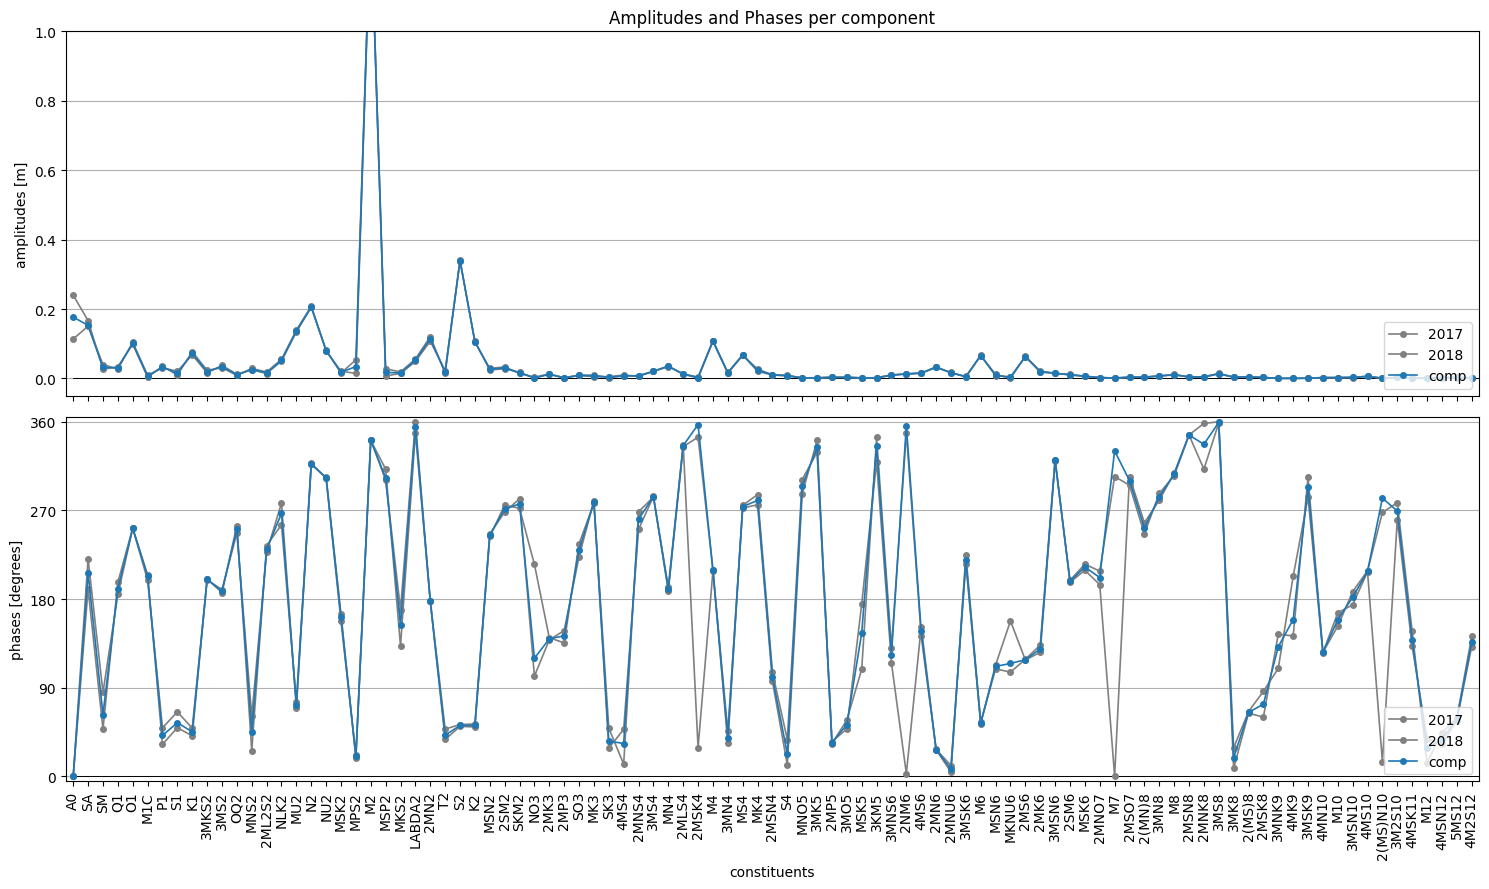

In [4]:
# tidal analysis and plotting of results 
comp_frommeas, comp_allperiods = hatyan.analysis(ts=ts_meas, const_list=const_list, 
                                               nodalfactors=True, return_allperiods=True,
                                               fu_alltimes=True, analysis_perperiod='Y')
fig,(ax1,ax2) = hatyan.plot_components(comp=comp_frommeas, comp_allperiods=comp_allperiods)
# fig.savefig('components.png')


PREDICTION initializing
{hatyan_settings}
components used = 95
tstart = 2017-01-01 00:00:00
tstop = 2018-12-31 00:00:00
timestep = <10 * Minutes>
nodal factors (f and u) are calculated for all timesteps
PREDICTION started
PREDICTION finished


(-0.5, 0.5)

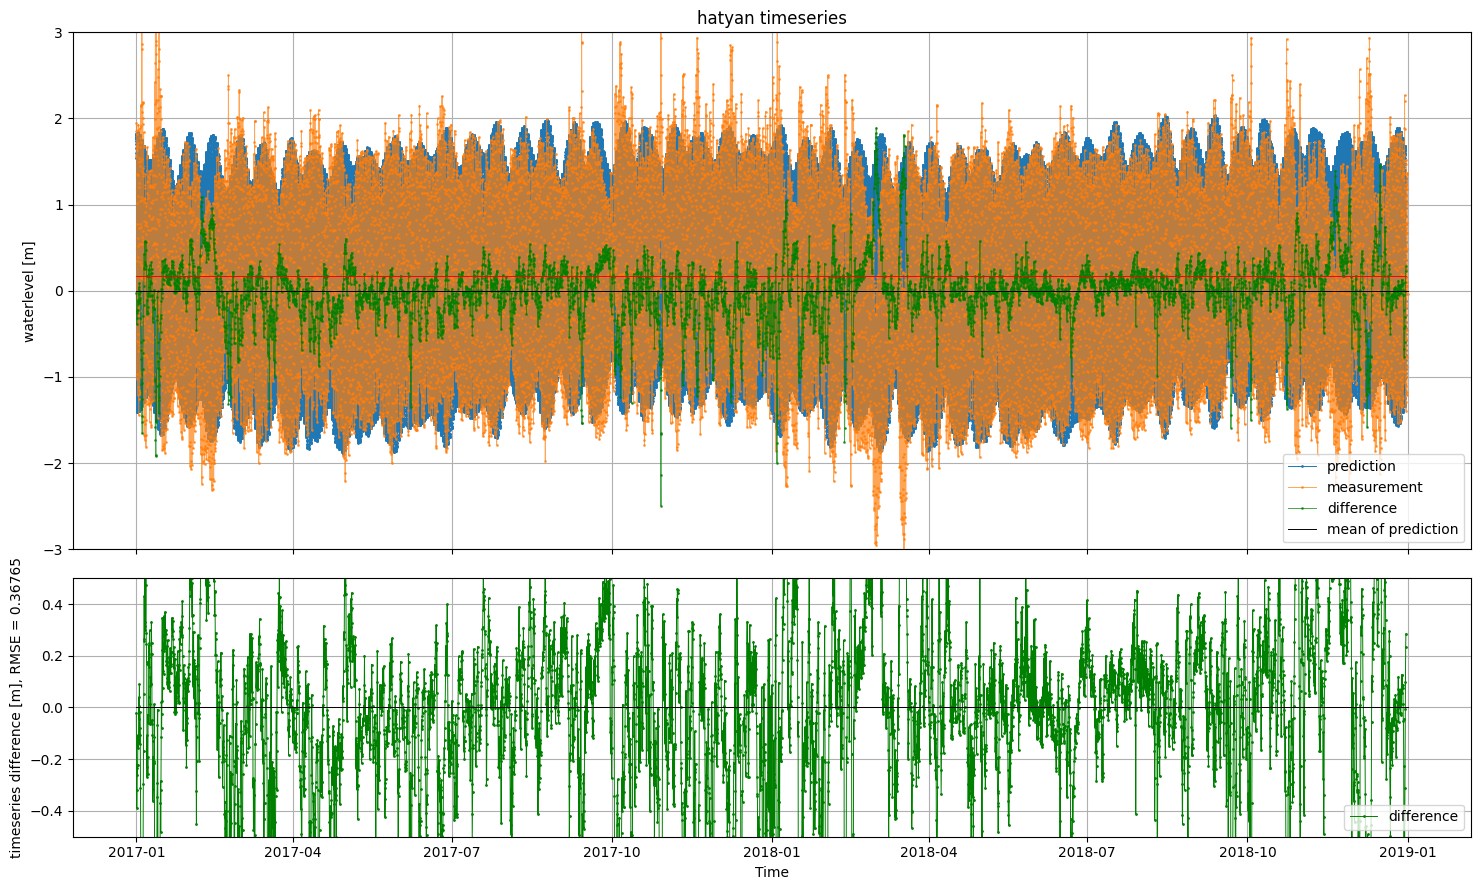

In [5]:
# tidal prediction and plotting of results
ts_prediction = hatyan.prediction(comp=comp_frommeas, nodalfactors=True, fu_alltimes=True, 
                                  times=times_pred)
fig, (ax1,ax2) = hatyan.plot_timeseries(ts=ts_prediction, ts_validation=ts_meas)
ax1.legend(['prediction','measurement','difference','mean of prediction'])
ax2.set_ylim(-0.5,0.5)
# fig.savefig('prediction.png')


the timestep of the series for which to calculate extremes/HWLW is 60.00 minutes, but 1 minute is recommended
the timestep of the series for which to calculate extremes/HWLW is 10.00 minutes, but 1 minute is recommended
Calculating comparison statistics for extremes
HWLWno is not present in ts_ext or ts_ext_validation, trying to automatically derive it without M2phasediff argument (this might fail)
running: analysis
ANALYSIS initializing
{hatyan_settings}
#timesteps    = 2815
tstart        = 2017-01-01 08:30:00tstop         = 2018-12-30 12:40:00
timestep      = None
components analyzed  = 1
percentage_nan in values_meas_sel: 0.00%
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (5.666666666666667 hour), there are 14 unique timesteps)
calculating xTx matrix
condition of xTx matrix: 7.71
matrix system solved, elapsed time: 0:00:00.001084
ANALYSIS finished
no value or None for argument M2phasediff 

(-1.0, 1.0)

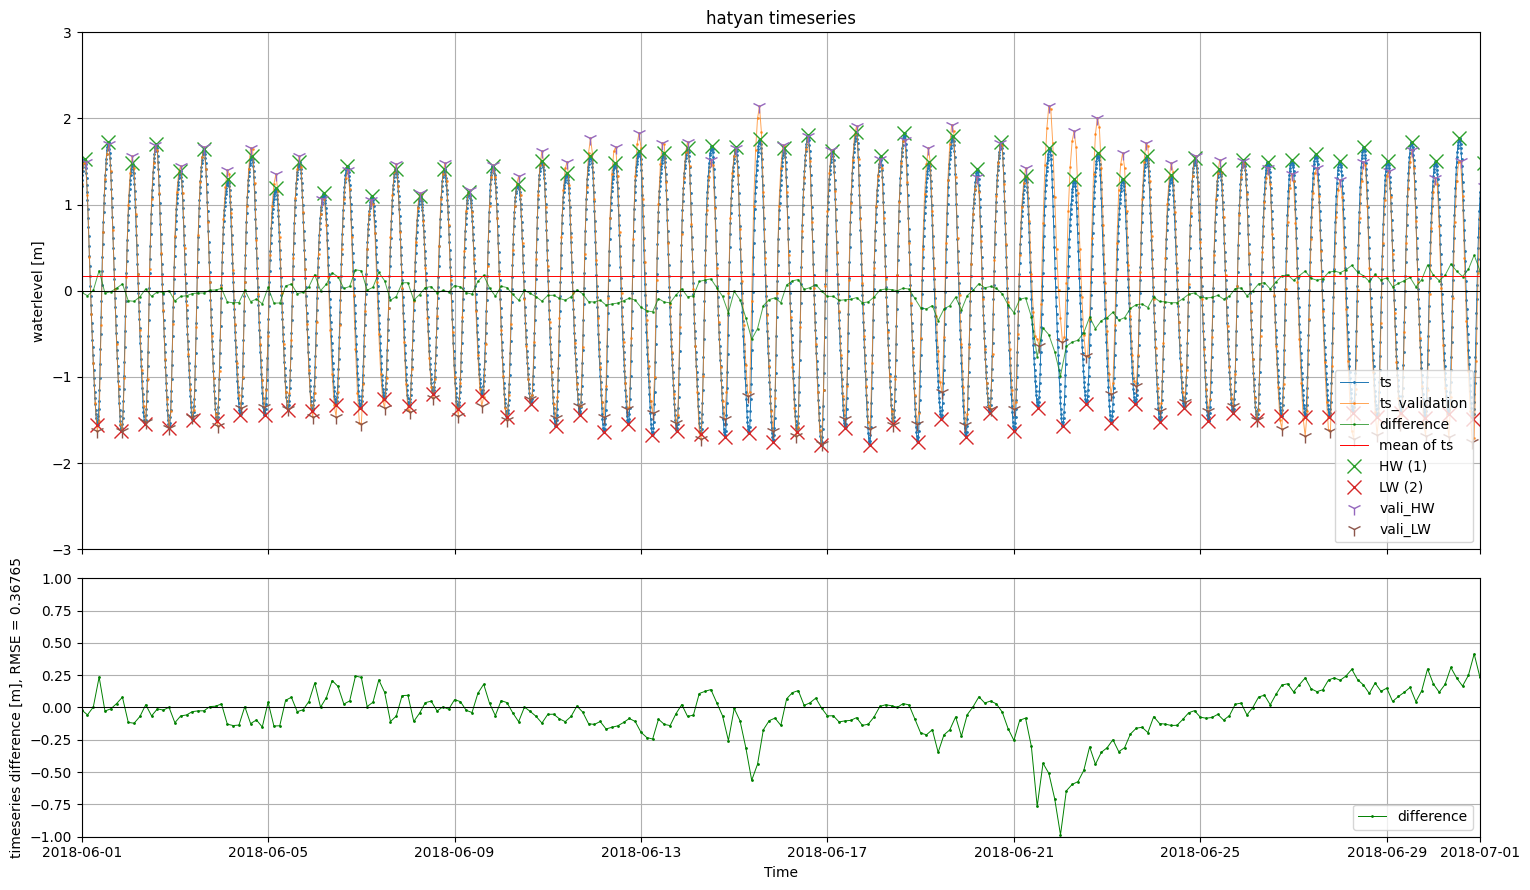

In [6]:
# calculation of HWLW and plotting of results
ts_ext_meas = hatyan.calc_HWLW(ts=ts_meas)
ts_ext_prediction = hatyan.calc_HWLW(ts=ts_prediction)
fig, (ax1,ax2) = hatyan.plot_timeseries(ts=ts_prediction, ts_validation=ts_meas, 
                                        ts_ext=ts_ext_prediction, ts_ext_validation=ts_ext_meas)
ax1.set_xlim(dt.datetime(2018,6,1),dt.datetime(2018,7,1))
ax2.set_ylim(-1,1)
# fig.savefig('prediction_HWLW.png')


Calculating comparison statistics for extremes
HWLWno is not present in ts_ext or ts_ext_validation, trying to automatically derive it without M2phasediff argument (this might fail)
running: analysis
ANALYSIS initializing
{hatyan_settings}
#timesteps    = 2815
tstart        = 2017-01-01 08:30:00tstop         = 2018-12-30 12:40:00
timestep      = None
components analyzed  = 1
percentage_nan in values_meas_sel: 0.00%
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (5.666666666666667 hour), there are 14 unique timesteps)
calculating xTx matrix
condition of xTx matrix: 7.71
matrix system solved, elapsed time: 0:00:00.001019
ANALYSIS finished
no value or None for argument M2phasediff provided, automatically calculated correction w.r.t. Cadzand based on M2phase: -1.94 hours (-56.18 degrees)
running: analysis
ANALYSIS initializing
{hatyan_settings}
#timesteps    = 2819
tstart        = 2017-01-01 09:00:

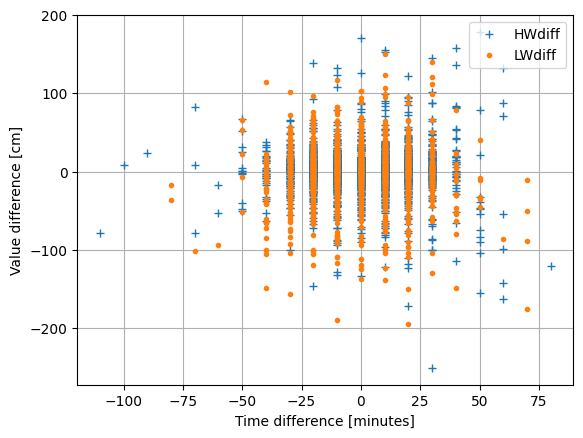

In [7]:
fig, ax = hatyan.plot_HWLW_validatestats(ts_ext=ts_ext_prediction, ts_ext_validation=ts_ext_meas)
# fig.savefig('prediction_HWLW_validatestats.png')
# ts_prediction.attrs["station"] = "Cuxhaven"
# ts_prediction.attrs["vertref"] = "MSL"
# ts_ext_prediction.attrs["station"] = "Cuxhaven"
# ts_ext_prediction.attrs["vertref"] = "MSL"
# hatyan.write_netcdf(ts=ts_prediction, ts_ext=ts_ext_prediction, filename='prediction.nc')
